# Customer Conversion Prediction

# Project Goal

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

In [1]:
## Load Modules/ Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the data
df = pd.read_csv("train.csv")

print("Shape of data:", df.shape)

Shape of data: (45211, 11)


In [3]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Data Pre - Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
## Checking for Null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


We can see there are Outliers for the columns age, dur and num_calls. So we have to remove the outliers.

In [7]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [8]:
#Removing the duplicates
df = df.drop_duplicates()
print(df.shape)

(45205, 11)


In [9]:
# Checking for the Outliers and removing them
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
upper_threshold = df['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['age'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

10.5 70.5


In [10]:
df['age'] = df['age'].clip(lower_threshold, upper_threshold)

In [11]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold = df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['dur'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

-221.0 643.0


In [12]:
df['dur'] = df['dur'].clip(lower_threshold, upper_threshold)

In [13]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5 * iqr)
print(lower_threshold, upper_threshold)

-2.0 6.0


In [14]:
df['num_calls'] = df['num_calls'].clip(lower_threshold, upper_threshold)

In [15]:
#Label encoding the target variable
df.replace({"y":{'no':0,'yes':1}},inplace=True)

In [16]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,0


# EDA - Data Visualization

In [17]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

We can see there are 288 unkown variables in the Job column which consider as less percentage. So moving forware we impute the unknown values with mode value of the Job Column

<AxesSubplot: xlabel='job', ylabel='count'>

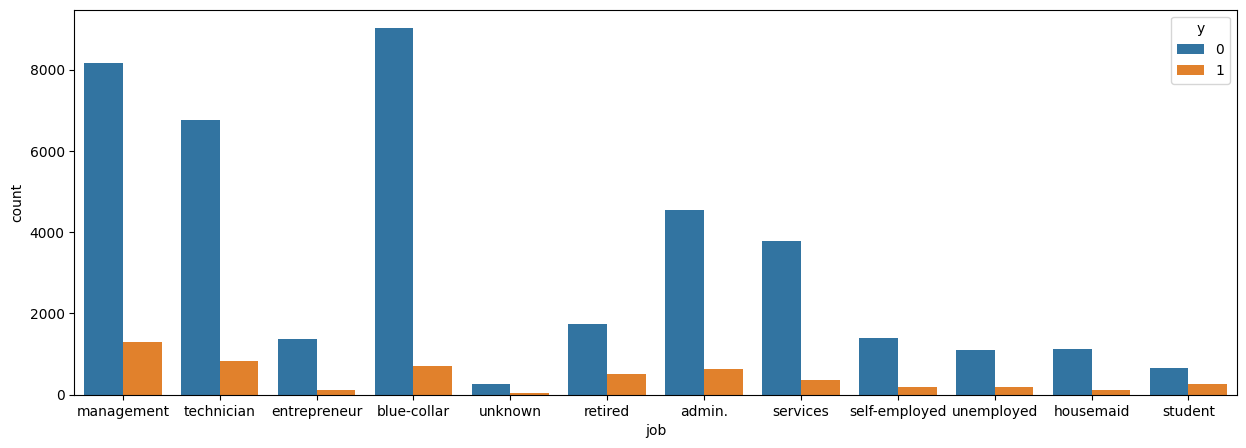

In [18]:
#Job vs Target Variable
plt.figure(figsize=(15, 5))
sns.countplot(x='job',hue='y',data=df)

In [19]:
df["job"].mode()

0    blue-collar
Name: job, dtype: object

In [20]:
df["job"] = df["job"].replace("unknown", "blue-collar")

<AxesSubplot: ylabel='job'>

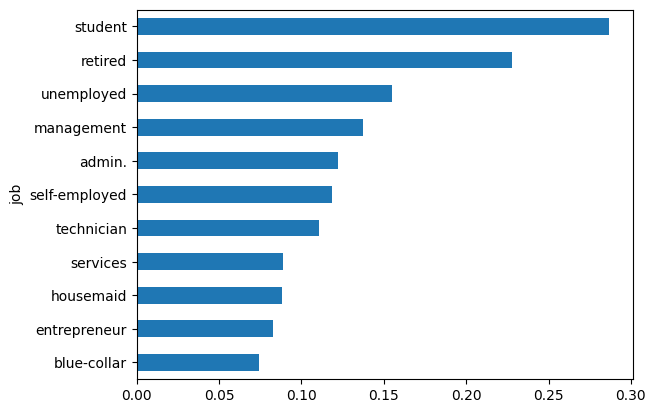

In [21]:
df.groupby('job')['y'].mean().sort_values().plot(kind='barh')

The following graph show conversion rate of the customer with regarding the their Job. As we can see that the customer who claim the insurance where belongs to student category and low conversion are from blue-collar. But the insurance company contacted the customers who belongs to Blue-collar.

In [22]:
#Label Encoding
df.replace({"job":{'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,1,married,unknown,unknown,5,may,92,1,unknown,0
4,33.0,1,single,unknown,unknown,5,may,198,1,unknown,0


In [23]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,1,married,unknown,unknown,5,may,92,1,unknown,0
4,33.0,1,single,unknown,unknown,5,may,198,1,unknown,0


In [24]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

<AxesSubplot: xlabel='marital', ylabel='count'>

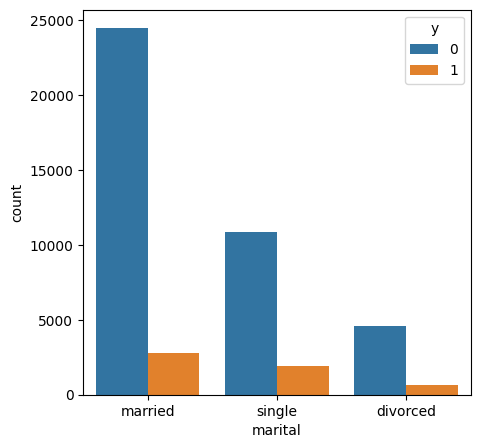

In [25]:
#Job vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='marital',hue='y',data=df)

<AxesSubplot: ylabel='marital'>

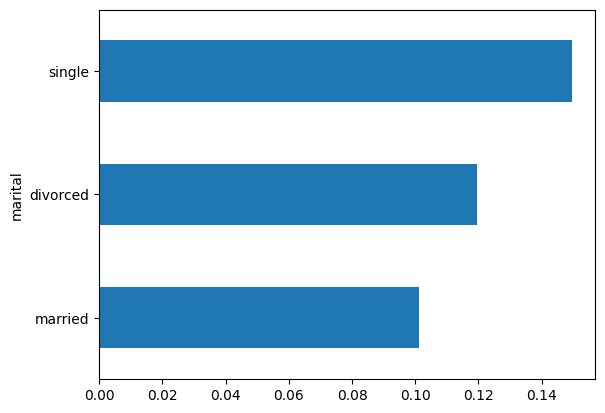

In [26]:
df.groupby('marital')['y'].mean().sort_values().plot(kind='barh')

The following graph show conversion rate of the customer with regarding the their marital status. As we can see that the customer who claim the insurance where belongs to single category and low conversion are married. But the insurance company contacted the customers who belongs to married category.

In [27]:
#Label encoding
df.replace({"marital":{'married':1,'divorced':2,'single':2}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,2,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,1,secondary,unknown,5,may,76,1,unknown,0
3,47.0,1,1,unknown,unknown,5,may,92,1,unknown,0
4,33.0,1,2,unknown,unknown,5,may,198,1,unknown,0


In [28]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

We can see there are 1857 unkown variables in the Job column which consider as less percentage. So moving forware we impute the unknown values with mode value of the Education Column

<AxesSubplot: xlabel='education_qual', ylabel='count'>

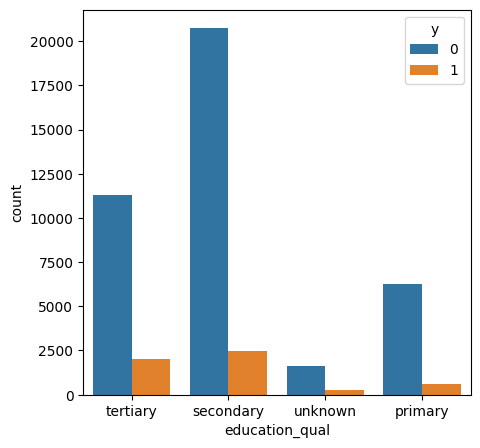

In [29]:
#education_qual vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='education_qual',hue='y',data=df)

In [30]:
df["education_qual"].mode()

0    secondary
Name: education_qual, dtype: object

In [31]:
df["education_qual"] = df["education_qual"].replace("unknown", "secondary")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,2,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,1,secondary,unknown,5,may,76,1,unknown,0
3,47.0,1,1,secondary,unknown,5,may,92,1,unknown,0
4,33.0,1,2,secondary,unknown,5,may,198,1,unknown,0


<AxesSubplot: ylabel='education_qual'>

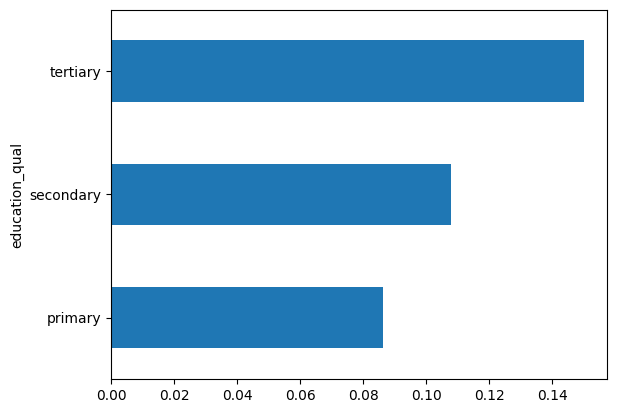

In [32]:
df.groupby('education_qual')['y'].mean().sort_values().plot(kind='barh')

The following graph show conversion rate of the customer with regarding the their education. As we can see that the customer who claim the insurance mostly are belong Tertiary Education and low conversion are primary education.

In [33]:
#Label Encoding
df.replace({"education_qual":{'primary':1,'secondary':2,'tertiary':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,unknown,5,may,261,1,unknown,0
1,44.0,5,2,2,unknown,5,may,151,1,unknown,0
2,33.0,2,1,2,unknown,5,may,76,1,unknown,0
3,47.0,1,1,2,unknown,5,may,92,1,unknown,0
4,33.0,1,2,2,unknown,5,may,198,1,unknown,0


In [34]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

We can see there are 13017 unkown variables in the call_type column which are very high in percentage. So data imputing for this doesn't work. so moving we consider the unknown variable as a category itself

<AxesSubplot: xlabel='call_type', ylabel='count'>

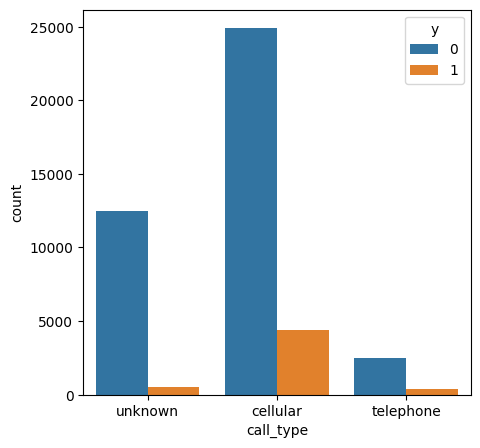

In [35]:
#call_type vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='call_type',hue='y',data=df)

<AxesSubplot: ylabel='call_type'>

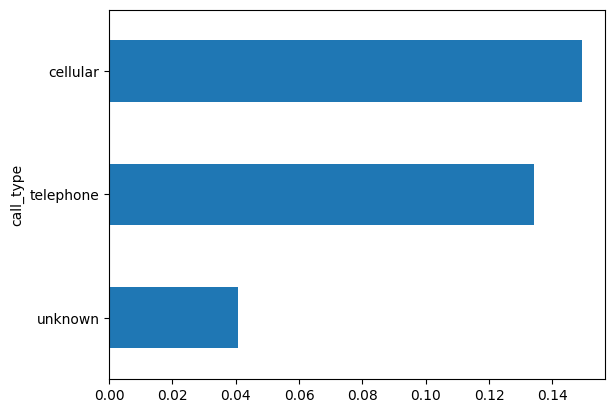

In [36]:
df.groupby('call_type')['y'].mean().sort_values().plot(kind='barh')

The following graph show conversion rate of the customer with regarding call_type. As we can see that the customer who claim the insurance mostly contacted through cellular and low conversion are unknown.

In [37]:
#Label Encoding
df.replace({"call_type":{'unknown':1,'telephone':2,'cellular':3}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,may,261,1,unknown,0
1,44.0,5,2,2,1,5,may,151,1,unknown,0
2,33.0,2,1,2,1,5,may,76,1,unknown,0
3,47.0,1,1,2,1,5,may,92,1,unknown,0
4,33.0,1,2,2,1,5,may,198,1,unknown,0


In [38]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<AxesSubplot: xlabel='mon', ylabel='count'>

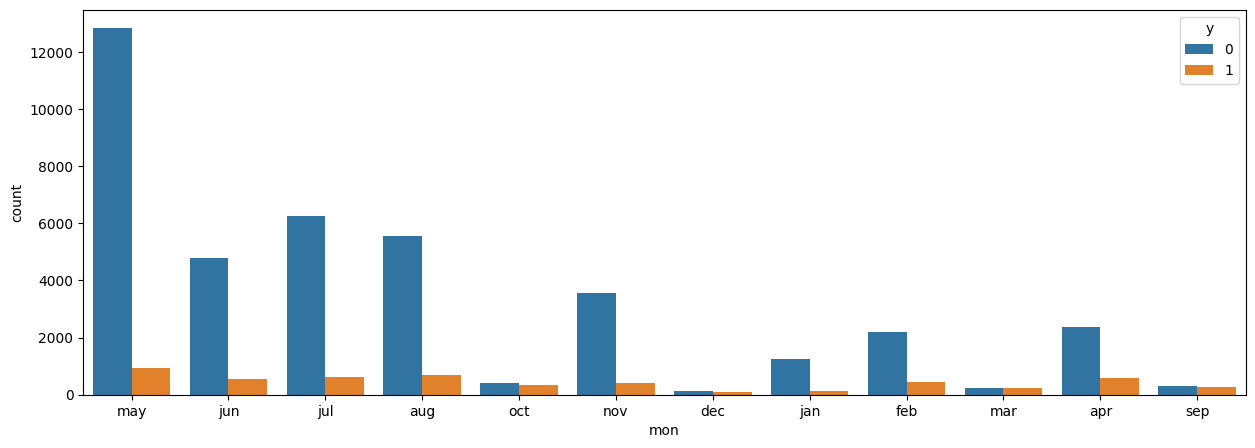

In [39]:
#Month vs Target Variable
plt.figure(figsize=(15, 5))
sns.countplot(x='mon',hue='y',data=df)

<AxesSubplot: ylabel='mon'>

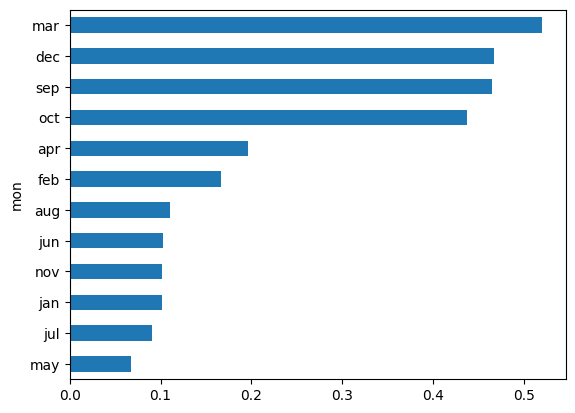

In [40]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='barh')

The following graph show conversion rate of the customer with regarding month. As we can see that the customer who claim the insurance mostly contacted in mar and low conversion are may.

In [41]:
#Label Encoding for the column mon (Month)
df.replace({"mon":{'may':1,'jul':2,'jan':3,'nov':4,'jun':5,'aug':6,'feb':7,'apr':8,'oct':9,'sep':10,'dec':11,'mar':12,}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261,1,unknown,0
1,44.0,5,2,2,1,5,1,151,1,unknown,0
2,33.0,2,1,2,1,5,1,76,1,unknown,0
3,47.0,1,1,2,1,5,1,92,1,unknown,0
4,33.0,1,2,2,1,5,1,198,1,unknown,0


In [42]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

We can see there are 36953 unkown variables in the prev_outcome column which are very high in percentage. So data imputing for this doesn't work. so moving we consider the unknown variable as a category itself

<AxesSubplot: xlabel='prev_outcome', ylabel='count'>

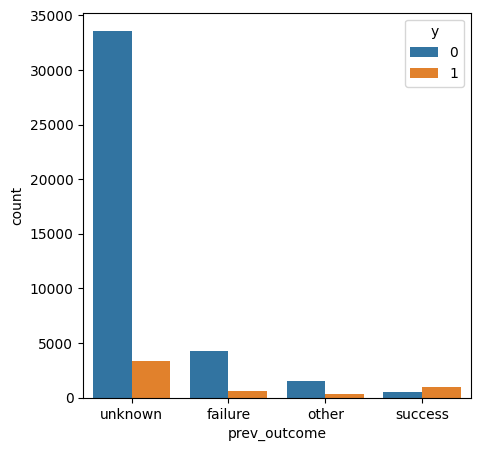

In [43]:
#prev_outcome vs Target Variable
plt.figure(figsize=(5, 5))
sns.countplot(x='prev_outcome',hue='y',data=df)

<AxesSubplot: ylabel='prev_outcome'>

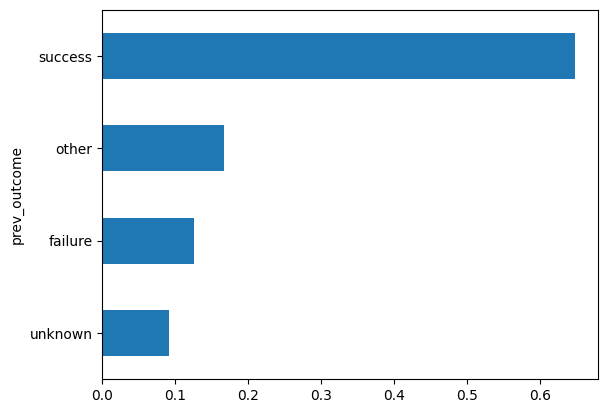

In [44]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot(kind='barh')

The following graph show conversion rate of the customer with regarding prev_outcome. As we can see that the customer who claim the insurance mostly took the claim earlier and low conversion were the people whose prev_outcome is unknown.

In [45]:
#Label Encoding
df.replace({"prev_outcome":{'unknown':1,'failure':2,'other':3,'success':4}},inplace=True)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8,1,3,1,5,1,261,1,1,0
1,44.0,5,2,2,1,5,1,151,1,1,0
2,33.0,2,1,2,1,5,1,76,1,1,0
3,47.0,1,1,2,1,5,1,92,1,1,0
4,33.0,1,2,2,1,5,1,198,1,1,0


## Ploting the Numercial features vs Target Variable

<AxesSubplot: xlabel='y', ylabel='age'>

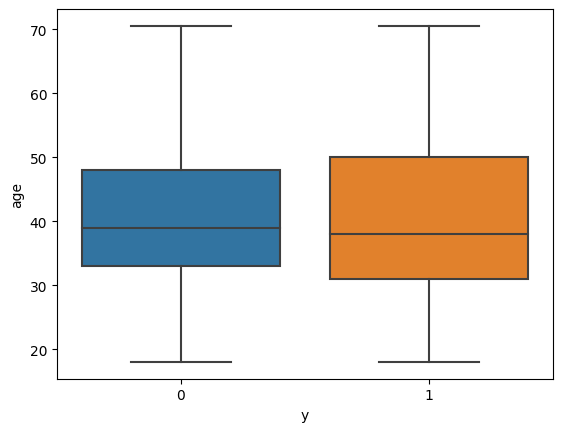

In [46]:
sns.boxplot(df, x='y', y='age')

<AxesSubplot: xlabel='y', ylabel='day'>

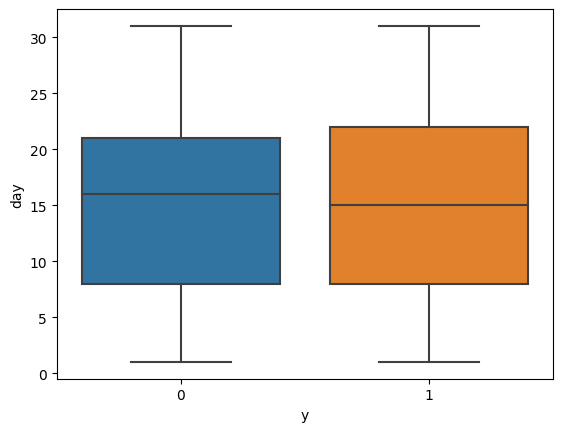

In [47]:
sns.boxplot(df, x='y', y='day')

<AxesSubplot: xlabel='y', ylabel='dur'>

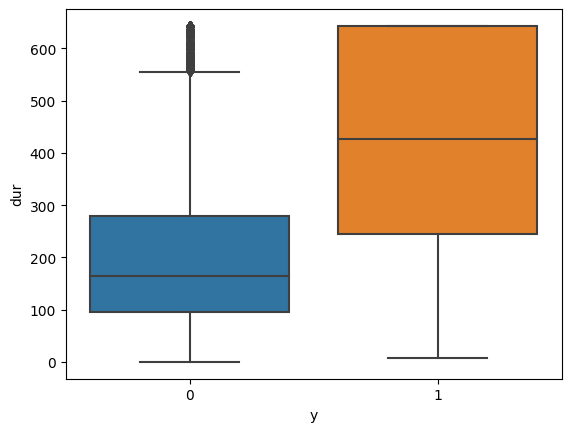

In [48]:
sns.boxplot(df, x='y', y='dur')

<AxesSubplot: xlabel='y', ylabel='num_calls'>

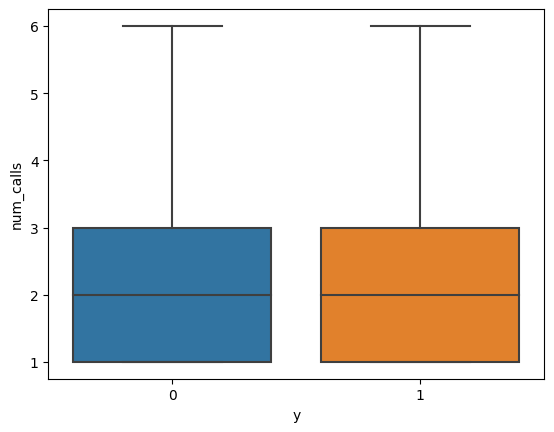

In [49]:
sns.boxplot(df, x='y', y='num_calls')

## Splitting the Data

In [50]:
# Separating the Feature and Target
X = df.drop(columns=['y'],axis=1)
Y = df['y']

In [51]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Balancing the data

In [52]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train, Y_train = smt.fit_resample(X_train, Y_train)

I tried all the approaches to balance the data, Like Random Oversampling, Randing Undersampling, Cluster Centeriods and also also SMOTE. But SOMTEENN Giving the Best AUROC Score out of all other approaches. So the Choose the SMOTEENN for Balancing my data

In [53]:
print(X_train.shape,Y_train.shape)

(54802, 10) (54802,)


In [54]:
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## XGBoost Classifier

In [55]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.5,0.75,1]:
  model = xgb.XGBClassifier(objective="binary:logistic", learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train,Y_train)
  model.score(X_test, Y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9145469143461917  Cross-Val score :  0.9116273570143443
Learning rate :  0.03  Train score :  0.9292544067734754  Cross-Val score :  0.9254407961411484
Learning rate :  0.05  Train score :  0.9410605452355754  Cross-Val score :  0.9352216216072244
Learning rate :  0.07  Train score :  0.948870479179592  Cross-Val score :  0.9426120360049379
Learning rate :  0.09  Train score :  0.9571366008539834  Cross-Val score :  0.9483601379416884
Learning rate :  0.1  Train score :  0.9602934199481771  Cross-Val score :  0.9505864019965454
Learning rate :  0.2  Train score :  0.9769716433706799  Cross-Val score :  0.9644005702513129
Learning rate :  0.5  Train score :  0.9915331557242436  Cross-Val score :  0.9704407095780114
Learning rate :  0.75  Train score :  0.9961680230648516  Cross-Val score :  0.970422547965966
Learning rate :  1  Train score :  0.9988504069194555  Cross-Val score :  0.9694736828086942


In [56]:
import xgboost as xgb

classifier = xgb.XGBClassifier(objective="binary:logistic", learning_rate = 0.5, n_estimators=100, verbosity = 0)
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
from sklearn.metrics import roc_auc_score
Y_pred = classifier.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(Y_test, Y_pred)
print("AUROC score: %.2f%%" % (auroc * 100.0))

AUROC score: 92.12%


## Feature Importance

In [58]:
# Get feature importance scores
importances = classifier.feature_importances_
feature_names = X.columns

# Print the feature importance scores
for i, importance in enumerate(importances):
    print("{}: {}".format(feature_names[i], importance))

age: 0.059038806706666946
job: 0.04023004323244095
marital: 0.026338737457990646
education_qual: 0.019245458766818047
call_type: 0.3008005619049072
day: 0.0413818284869194
mon: 0.15346434712409973
dur: 0.171474426984787
num_calls: 0.05665822699666023
prev_outcome: 0.13136757910251617


Text(0.5, 0, 'Xgboost Feature Importance')

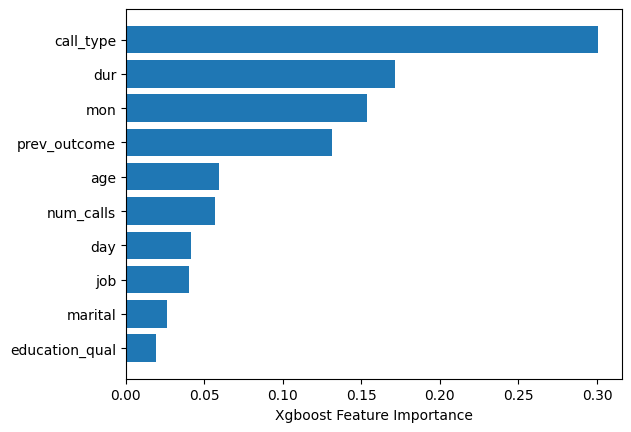

In [59]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## Saving the trained model

In [60]:
import pickle

In [61]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [62]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))